In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=512

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

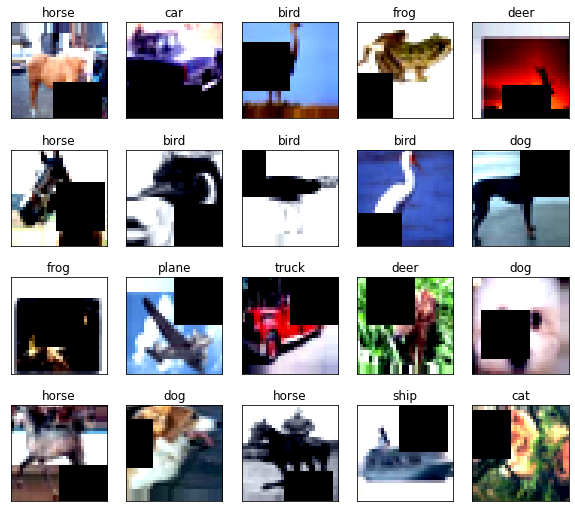

In [5]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [6]:
import drishtypy.models.resnet_S11 as mod
model = mod.ResNet_11()




In [7]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## Finding out the Learning Rate to fit into OneCyclic Policy

In [8]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.41E-01


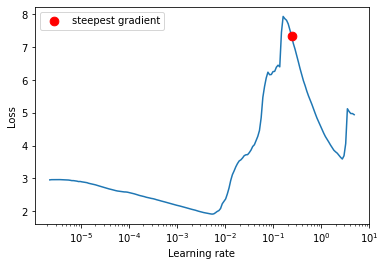

Using Learning Rate :  0.005353566677410723


In [9]:
import torch.optim as optim
import torch.nn as nn
from torch_lr_finder import LRFinder
optimizer = optim.SGD(model.parameters(), lr=0.000001, momentum=0.95, nesterov=True)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot()
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
    
lr = lr[loss.index(min(loss))]
print('Using Learning Rate : ', lr)
lr_finder.reset()

## Based on previous Loss graph fixing a range to test accuracy vs LR

In [13]:
import torch.nn as nn
from drishtypy.utils.LR_Test import lr_test

# Based on previous Loss graph fixing a range to test accuracy vs LR
max_lr = 0.1
min_lr = 0.005

print('Max LR :{} and MIN LR : {}'.format(max_lr,min_lr))
epoch = 10


Max LR :0.1 and MIN LR : 0.005


epoch = 1 Lr = 0.005  Loss=1.2158758640289307 Batch_id=97 Accuracy=36.83: 100%|██████████| 98/98 [00:18<00:00,  5.39it/s]
epoch = 2 Lr = 0.014499999999999999  Loss=2.12953519821167 Batch_id=97 Accuracy=15.75: 100%|██████████| 98/98 [00:18<00:00,  5.26it/s]  
epoch = 3 Lr = 0.024  Loss=2.8131349086761475 Batch_id=97 Accuracy=12.18: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]
epoch = 4 Lr = 0.0335  Loss=2.96928334236145 Batch_id=97 Accuracy=11.97: 100%|██████████| 98/98 [00:19<00:00,  5.13it/s]  
epoch = 5 Lr = 0.043000000000000003  Loss=2.3729021549224854 Batch_id=97 Accuracy=11.08: 100%|██████████| 98/98 [00:19<00:00,  5.08it/s]
epoch = 6 Lr = 0.052500000000000005  Loss=2.2839009761810303 Batch_id=97 Accuracy=10.70: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]
epoch = 7 Lr = 0.062000000000000006  Loss=2.511950969696045 Batch_id=97 Accuracy=11.02: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s] 
epoch = 8 Lr = 0.07150000000000001  Loss=2.291491746902466 Batch_id=97 Accuracy=11.26

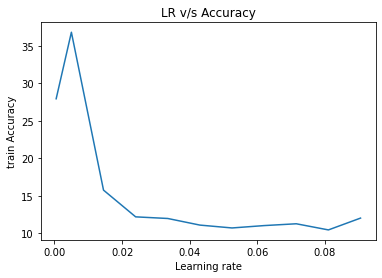

In [14]:
lr_test(max_lr, min_lr,device,epoch,model,criterion,train_loader,momemtum = 0.9,weight_decay=0.0005, plot= True)

 ## Scheduling rules used
epochs = epochs

steps_per_epoch = len(trainloader)

total_steps = steps_per_epoch * epochs

pct_start = 5/epochs


    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                    max_lr = lr,
                                                    total_steps=None,
                                                    epochs=epochs,
                                                    steps_per_epoch=len(trainloader),
                                                    pct_start=pct_start,
                                                    anneal_strategy='linear',
                                                    div_factor=100.0,
                                                    final_div_factor = 1)

In [15]:
# build and train the model
model_name = "Resnet11"
EPOCHS = 24
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.0005,
                                                            lr = 0.1)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.098614 Batch_id=97 Accuracy=33.60: 100%|██████████| 98/98 [00:18<00:00,  5.33it/s]

LR: [0.020120858895705522]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.789749, Accuracy: 4943/10000 (49.43%)

EPOCH: 1


Loss=1.624058 Batch_id=97 Accuracy=48.87: 100%|██████████| 98/98 [00:18<00:00,  5.38it/s]

LR: [0.04014171779141105]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.777062, Accuracy: 4958/10000 (49.58%)

EPOCH: 2


Loss=1.371605 Batch_id=97 Accuracy=56.71: 100%|██████████| 98/98 [00:18<00:00,  5.32it/s]

LR: [0.06016257668711657]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 7.516256, Accuracy: 2433/10000 (24.33%)

EPOCH: 3


Loss=1.225043 Batch_id=97 Accuracy=61.70: 100%|██████████| 98/98 [00:18<00:00,  5.29it/s]

LR: [0.0801834355828221]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.902632, Accuracy: 6889/10000 (68.89%)

EPOCH: 4


Loss=0.960756 Batch_id=97 Accuracy=68.51: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]

LR: [0.09994634801288937]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.875154, Accuracy: 6948/10000 (69.48%)

EPOCH: 5


Loss=0.835130 Batch_id=97 Accuracy=72.34: 100%|██████████| 98/98 [00:18<00:00,  5.30it/s]

LR: [0.09468845327604726]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.804875, Accuracy: 7407/10000 (74.07%)

EPOCH: 6


Loss=0.708279 Batch_id=97 Accuracy=76.13: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]

LR: [0.08943055853920516]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.615186, Accuracy: 8015/10000 (80.15%)

EPOCH: 7


Loss=0.623071 Batch_id=97 Accuracy=78.44: 100%|██████████| 98/98 [00:19<00:00,  5.12it/s]

LR: [0.08417266380236306]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.579718, Accuracy: 8081/10000 (80.81%)

EPOCH: 8


Loss=0.572611 Batch_id=97 Accuracy=80.02: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.07891476906552095]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.493838, Accuracy: 8283/10000 (82.83%)

EPOCH: 9


Loss=0.521685 Batch_id=97 Accuracy=81.80: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]

LR: [0.07365687432867885]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.479298, Accuracy: 8357/10000 (83.57%)

EPOCH: 10


Loss=0.475073 Batch_id=97 Accuracy=83.47: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]

LR: [0.06839897959183674]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.589534, Accuracy: 8136/10000 (81.36%)

EPOCH: 11


Loss=0.441105 Batch_id=97 Accuracy=84.49: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]

LR: [0.06314108485499463]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.481739, Accuracy: 8455/10000 (84.55%)

EPOCH: 12


Loss=0.418316 Batch_id=97 Accuracy=85.31: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.05788319011815253]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.392832, Accuracy: 8679/10000 (86.79%)

EPOCH: 13


Loss=0.389833 Batch_id=97 Accuracy=86.20: 100%|██████████| 98/98 [00:19<00:00,  5.10it/s]

LR: [0.05262529538131042]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.469511, Accuracy: 8441/10000 (84.41%)

EPOCH: 14


Loss=0.363948 Batch_id=97 Accuracy=87.12: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.047367400644468316]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.391317, Accuracy: 8755/10000 (87.55%)

EPOCH: 15


Loss=0.336314 Batch_id=97 Accuracy=88.25: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]

LR: [0.042109505907626216]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.376463, Accuracy: 8783/10000 (87.83%)

EPOCH: 16


Loss=0.310000 Batch_id=97 Accuracy=88.87: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.0368516111707841]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.398323, Accuracy: 8744/10000 (87.44%)

EPOCH: 17


Loss=0.290737 Batch_id=97 Accuracy=89.77: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]

LR: [0.031593716433942]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.361694, Accuracy: 8815/10000 (88.15%)

EPOCH: 18


Loss=0.261706 Batch_id=97 Accuracy=90.72: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]

LR: [0.0263358216970999]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.346584, Accuracy: 8867/10000 (88.67%)

EPOCH: 19


Loss=0.242554 Batch_id=97 Accuracy=91.40: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]

LR: [0.021077926960257787]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.366390, Accuracy: 8866/10000 (88.66%)

EPOCH: 20


Loss=0.217345 Batch_id=97 Accuracy=92.33: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]

LR: [0.015820032223415686]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.349687, Accuracy: 8962/10000 (89.62%)

EPOCH: 21


Loss=0.196327 Batch_id=97 Accuracy=92.98: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]

LR: [0.010562137486573572]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.327398, Accuracy: 9002/10000 (90.02%)

EPOCH: 22


Loss=0.170976 Batch_id=97 Accuracy=94.11: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.005304242749731472]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.314487, Accuracy: 9059/10000 (90.59%)

EPOCH: 23


Loss=0.140334 Batch_id=97 Accuracy=95.14: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]

LR: [4.634801288937174e-05]



Test set: Average loss: 0.296296, Accuracy: 9135/10000 (91.35%)



In [16]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)


Accuracy of the network on the 10000 test images: 91.35%

Accuracy of plane : 81 %
Accuracy of   car : 100 %
Accuracy of  bird : 66 %
Accuracy of   cat : 83 %
Accuracy of  deer : 66 %
Accuracy of   dog : 100 %
Accuracy of  frog : 81 %
Accuracy of horse : 83 %
Accuracy of  ship : 100 %
Accuracy of truck : 90 %



Ploting Accuracy and Loss history: Resnet11



/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1, x_size + 1), x_size / 10)
/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1, x_size + 1), x_size / 10)


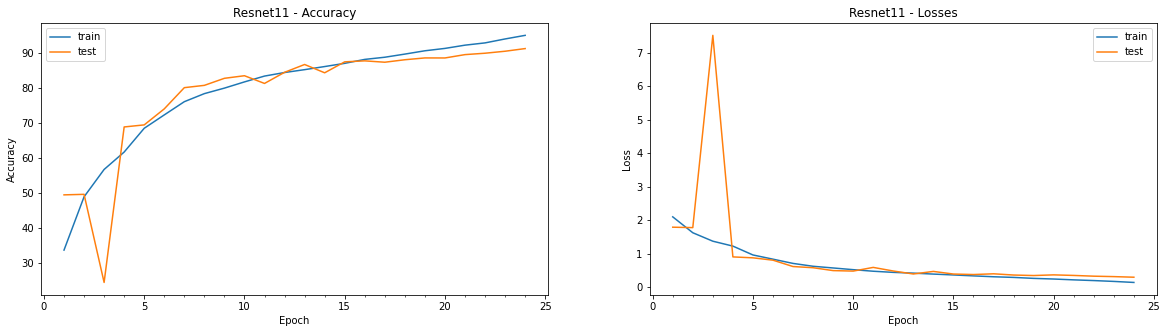

In [17]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

In [18]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

/home/abhinav/Drishtypy
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254


In [ ]:
# path = os.getcwd() + '/Out'


/home/abhinav/Drishtypy/drishtypy/viz/gradcam/gradcam_abs.py:70: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  wrong_idx = (pred_marker == False).nonzero()  # get indices for wrong predictions
/home/abhinav/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


PermissionError: [Errno 13] Permission denied: '../../Outputgradcam_result_details.png'

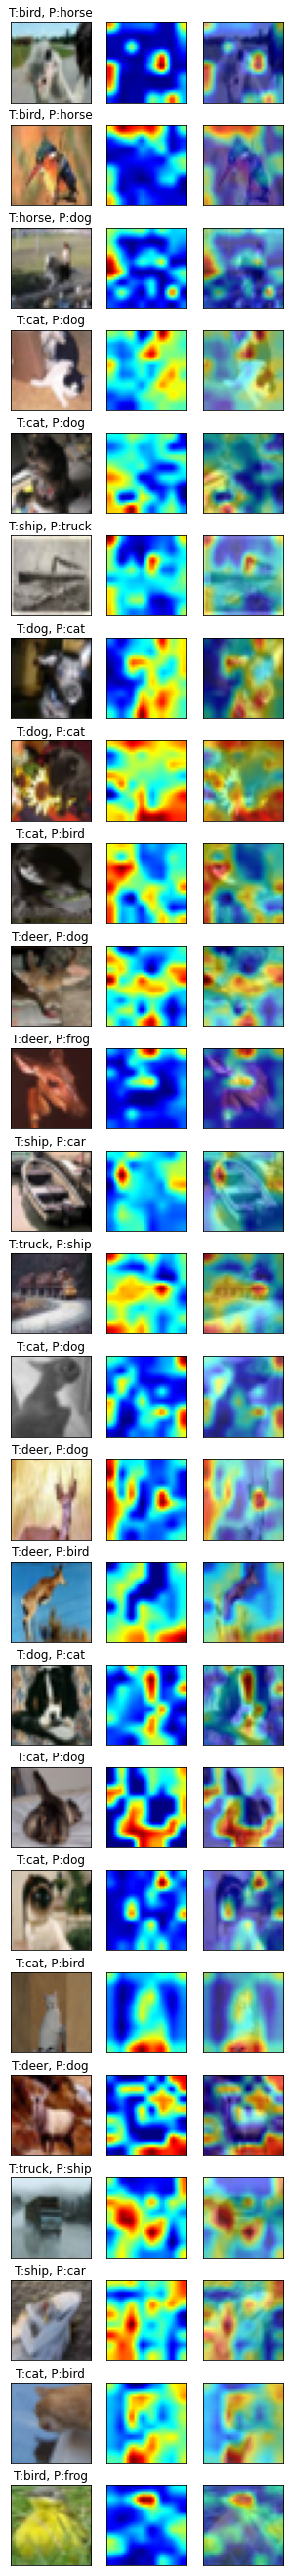

In [19]:
config = dict(model_type='resnet', arch=model, layer_name='layer2')
gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")

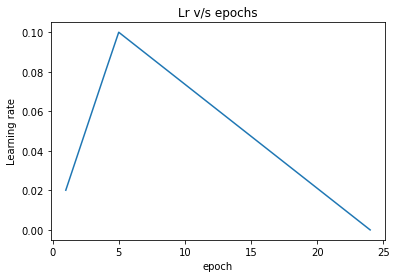

In [22]:
import matplotlib.pyplot as plt
from drishtypy.learner import learner
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,learner.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()
